# Training Setup

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

def train_model_and_plot_stats(
        model, error, learning_rule, train_data, scheduler,
        valid_data, num_epochs, stats_interval, 
        notebook=True):
    
    # As well as monitoring the error over training also monitor classification
    # accuracy i.e. proportion of most-probable predicted classes being equal to targets
    data_monitors={'acc': lambda y, t: (y.argmax(-1) == t.argmax(-1)).mean()}

    # Use the created objects to initialise a new Optimiser instance.
    optimiser = Optimiser(
        model, error, learning_rule, train_data, scheduler, valid_data, data_monitors, notebook=notebook)

    # Run the optimiser for 5 epochs (full passes through the training set)
    # printing statistics every epoch.
    stats, keys, run_time = optimiser.train(num_epochs=num_epochs, stats_interval=stats_interval)

    # Plot the change in the validation and training set error over training.
    fig_1 = plt.figure(figsize=(8, 4))
    ax_1 = fig_1.add_subplot(111)
    for k in ['error(train)', 'error(valid)']:
        ax_1.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    ax_1.legend(loc=0)
    ax_1.set_xlabel('Epoch number')

    # Plot the change in the validation and training set accuracy over training.
    fig_2 = plt.figure(figsize=(8, 4))
    ax_2 = fig_2.add_subplot(111)
    for k in ['acc(train)', 'acc(valid)']:
        ax_2.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    ax_2.legend(loc=0)
    ax_2.set_xlabel('Epoch number')
    
    return stats, keys, run_time, fig_1, ax_1, fig_2, ax_2

In [2]:
# The below code will set up the data providers, random number
# generator and logger objects needed for training runs. As
# loading the data from file take a little while you generally
# will probably not want to reload the data providers on
# every training run. If you wish to reset their state you
# should instead use the .reset() method of the data providers.
import numpy as np
import logging
from mlp.data_providers import MNISTDataProvider, EMNISTDataProvider

# Seed a random number generator
seed = 11102018 
rng = np.random.RandomState(seed)
batch_size = 100
# Set up a logger object to print info about the training run to stdout
logger = logging.getLogger()
logger.setLevel(logging.INFO)
logger.handlers = [logging.StreamHandler()]

# Create data provider objects for the MNIST data set
train_data = EMNISTDataProvider('train', batch_size=batch_size, rng=rng)
valid_data = EMNISTDataProvider('test', batch_size=batch_size, rng=rng)

KeysView(<numpy.lib.npyio.NpzFile object at 0x111cfa940>)
KeysView(<numpy.lib.npyio.NpzFile object at 0x111cfa2b0>)


In [3]:
from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer, LeakyReluLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import AdamLearningRule, GradientDescentLearningRule, RMSPropLearningRule
from mlp.optimisers import Optimiser
from mlp.schedulers import CosineAnnealingWithWarmRestarts

Epoch 1: 7.1s to complete
    error(train)=3.43e+00, acc(train)=1.69e-01, error(valid)=3.44e+00, acc(valid)=1.65e-01


Epoch 2: 7.8s to complete
    error(train)=2.69e+00, acc(train)=3.63e-01, error(valid)=2.71e+00, acc(valid)=3.59e-01


Epoch 3: 8.6s to complete
    error(train)=2.16e+00, acc(train)=4.56e-01, error(valid)=2.18e+00, acc(valid)=4.52e-01


Epoch 4: 8.0s to complete
    error(train)=1.85e+00, acc(train)=5.14e-01, error(valid)=1.88e+00, acc(valid)=5.04e-01


Epoch 5: 7.8s to complete
    error(train)=1.67e+00, acc(train)=5.53e-01, error(valid)=1.69e+00, acc(valid)=5.45e-01


Epoch 6: 7.8s to complete
    error(train)=1.55e+00, acc(train)=5.81e-01, error(valid)=1.57e+00, acc(valid)=5.72e-01


Epoch 7: 7.7s to complete
    error(train)=1.46e+00, acc(train)=6.01e-01, error(valid)=1.48e+00, acc(valid)=5.94e-01


Epoch 8: 8.2s to complete
    error(train)=1.39e+00, acc(train)=6.17e-01, error(valid)=1.41e+00, acc(valid)=6.07e-01


Epoch 9: 8.0s to complete
    error(train)=1.33e+00, acc(train)=6.31e-01, error(valid)=1.36e+00, acc(valid)=6.22e-01


Epoch 10: 8.2s to complete
    error(train)=1.29e+00, acc(train)=6.40e-01, error(valid)=1.32e+00, acc(valid)=6.30e-01


Epoch 11: 7.7s to complete
    error(train)=1.25e+00, acc(train)=6.51e-01, error(valid)=1.28e+00, acc(valid)=6.40e-01


Epoch 12: 7.8s to complete
    error(train)=1.22e+00, acc(train)=6.59e-01, error(valid)=1.25e+00, acc(valid)=6.45e-01


Epoch 13: 7.8s to complete
    error(train)=1.19e+00, acc(train)=6.67e-01, error(valid)=1.22e+00, acc(valid)=6.55e-01


Epoch 14: 7.8s to complete
    error(train)=1.16e+00, acc(train)=6.73e-01, error(valid)=1.19e+00, acc(valid)=6.62e-01


Epoch 15: 7.8s to complete
    error(train)=1.14e+00, acc(train)=6.80e-01, error(valid)=1.17e+00, acc(valid)=6.67e-01


Epoch 16: 7.6s to complete
    error(train)=1.11e+00, acc(train)=6.86e-01, error(valid)=1.14e+00, acc(valid)=6.72e-01


Epoch 17: 7.5s to complete
    error(train)=1.09e+00, acc(train)=6.92e-01, error(valid)=1.13e+00, acc(valid)=6.79e-01


Epoch 18: 7.6s to complete
    error(train)=1.07e+00, acc(train)=6.97e-01, error(valid)=1.11e+00, acc(valid)=6.83e-01


Epoch 19: 7.6s to complete
    error(train)=1.05e+00, acc(train)=7.01e-01, error(valid)=1.09e+00, acc(valid)=6.88e-01


Epoch 20: 7.6s to complete
    error(train)=1.04e+00, acc(train)=7.06e-01, error(valid)=1.07e+00, acc(valid)=6.92e-01


Epoch 21: 7.6s to complete
    error(train)=1.02e+00, acc(train)=7.10e-01, error(valid)=1.06e+00, acc(valid)=6.96e-01


Epoch 22: 7.6s to complete
    error(train)=1.00e+00, acc(train)=7.14e-01, error(valid)=1.04e+00, acc(valid)=7.01e-01


Epoch 23: 7.5s to complete
    error(train)=9.89e-01, acc(train)=7.18e-01, error(valid)=1.03e+00, acc(valid)=7.05e-01


Epoch 24: 7.5s to complete
    error(train)=9.75e-01, acc(train)=7.22e-01, error(valid)=1.01e+00, acc(valid)=7.07e-01


Epoch 25: 7.5s to complete
    error(train)=9.64e-01, acc(train)=7.24e-01, error(valid)=1.00e+00, acc(valid)=7.08e-01


Epoch 26: 8.0s to complete
    error(train)=9.50e-01, acc(train)=7.29e-01, error(valid)=9.89e-01, acc(valid)=7.13e-01


Epoch 27: 7.6s to complete
    error(train)=9.39e-01, acc(train)=7.31e-01, error(valid)=9.79e-01, acc(valid)=7.14e-01


Epoch 28: 7.5s to complete
    error(train)=9.29e-01, acc(train)=7.33e-01, error(valid)=9.68e-01, acc(valid)=7.17e-01


Epoch 29: 7.5s to complete
    error(train)=9.18e-01, acc(train)=7.36e-01, error(valid)=9.58e-01, acc(valid)=7.18e-01


Epoch 30: 7.5s to complete
    error(train)=9.08e-01, acc(train)=7.38e-01, error(valid)=9.49e-01, acc(valid)=7.22e-01


Epoch 31: 7.4s to complete
    error(train)=8.98e-01, acc(train)=7.41e-01, error(valid)=9.39e-01, acc(valid)=7.24e-01


Epoch 32: 7.4s to complete
    error(train)=8.88e-01, acc(train)=7.43e-01, error(valid)=9.30e-01, acc(valid)=7.26e-01


Epoch 33: 7.5s to complete
    error(train)=8.80e-01, acc(train)=7.45e-01, error(valid)=9.21e-01, acc(valid)=7.28e-01


Epoch 34: 7.5s to complete
    error(train)=8.72e-01, acc(train)=7.48e-01, error(valid)=9.13e-01, acc(valid)=7.31e-01


Epoch 35: 8.1s to complete
    error(train)=8.65e-01, acc(train)=7.49e-01, error(valid)=9.06e-01, acc(valid)=7.32e-01


Epoch 36: 7.6s to complete
    error(train)=8.57e-01, acc(train)=7.51e-01, error(valid)=9.01e-01, acc(valid)=7.33e-01


Epoch 37: 7.4s to complete
    error(train)=8.51e-01, acc(train)=7.53e-01, error(valid)=8.95e-01, acc(valid)=7.36e-01


Epoch 38: 7.5s to complete
    error(train)=8.44e-01, acc(train)=7.54e-01, error(valid)=8.88e-01, acc(valid)=7.36e-01


Epoch 39: 7.8s to complete
    error(train)=8.39e-01, acc(train)=7.56e-01, error(valid)=8.84e-01, acc(valid)=7.38e-01


Epoch 40: 7.4s to complete
    error(train)=8.31e-01, acc(train)=7.58e-01, error(valid)=8.77e-01, acc(valid)=7.39e-01


Epoch 41: 7.4s to complete
    error(train)=8.26e-01, acc(train)=7.59e-01, error(valid)=8.71e-01, acc(valid)=7.42e-01


Epoch 42: 7.6s to complete
    error(train)=8.21e-01, acc(train)=7.60e-01, error(valid)=8.66e-01, acc(valid)=7.43e-01


Epoch 43: 8.8s to complete
    error(train)=8.15e-01, acc(train)=7.61e-01, error(valid)=8.61e-01, acc(valid)=7.45e-01


Epoch 44: 7.6s to complete
    error(train)=8.10e-01, acc(train)=7.64e-01, error(valid)=8.55e-01, acc(valid)=7.45e-01


Epoch 45: 7.7s to complete
    error(train)=8.06e-01, acc(train)=7.64e-01, error(valid)=8.53e-01, acc(valid)=7.46e-01


Epoch 46: 7.5s to complete
    error(train)=8.02e-01, acc(train)=7.64e-01, error(valid)=8.48e-01, acc(valid)=7.48e-01


Epoch 47: 7.4s to complete
    error(train)=7.98e-01, acc(train)=7.66e-01, error(valid)=8.45e-01, acc(valid)=7.47e-01


Epoch 48: 7.5s to complete
    error(train)=7.93e-01, acc(train)=7.67e-01, error(valid)=8.41e-01, acc(valid)=7.49e-01


Epoch 49: 7.6s to complete
    error(train)=7.89e-01, acc(train)=7.68e-01, error(valid)=8.36e-01, acc(valid)=7.51e-01


Epoch 50: 7.6s to complete
    error(train)=7.86e-01, acc(train)=7.68e-01, error(valid)=8.34e-01, acc(valid)=7.50e-01


Epoch 51: 7.7s to complete
    error(train)=7.82e-01, acc(train)=7.70e-01, error(valid)=8.30e-01, acc(valid)=7.50e-01


Epoch 52: 7.4s to complete
    error(train)=7.79e-01, acc(train)=7.70e-01, error(valid)=8.28e-01, acc(valid)=7.52e-01


Epoch 53: 7.7s to complete
    error(train)=7.75e-01, acc(train)=7.71e-01, error(valid)=8.24e-01, acc(valid)=7.52e-01


Epoch 54: 7.8s to complete
    error(train)=7.72e-01, acc(train)=7.72e-01, error(valid)=8.22e-01, acc(valid)=7.53e-01


Epoch 55: 7.6s to complete
    error(train)=7.69e-01, acc(train)=7.72e-01, error(valid)=8.19e-01, acc(valid)=7.54e-01


Epoch 56: 7.5s to complete
    error(train)=7.66e-01, acc(train)=7.73e-01, error(valid)=8.16e-01, acc(valid)=7.54e-01


Epoch 57: 7.6s to complete
    error(train)=7.63e-01, acc(train)=7.74e-01, error(valid)=8.14e-01, acc(valid)=7.56e-01


Epoch 58: 7.4s to complete
    error(train)=7.60e-01, acc(train)=7.75e-01, error(valid)=8.11e-01, acc(valid)=7.56e-01


Epoch 59: 10.2s to complete
    error(train)=7.58e-01, acc(train)=7.76e-01, error(valid)=8.09e-01, acc(valid)=7.55e-01


Epoch 60: 7.5s to complete
    error(train)=7.56e-01, acc(train)=7.76e-01, error(valid)=8.08e-01, acc(valid)=7.57e-01


Epoch 61: 7.7s to complete
    error(train)=7.53e-01, acc(train)=7.77e-01, error(valid)=8.05e-01, acc(valid)=7.58e-01


Epoch 62: 7.4s to complete
    error(train)=7.51e-01, acc(train)=7.77e-01, error(valid)=8.02e-01, acc(valid)=7.58e-01


Epoch 63: 7.5s to complete
    error(train)=7.50e-01, acc(train)=7.78e-01, error(valid)=8.03e-01, acc(valid)=7.58e-01


Epoch 64: 7.4s to complete
    error(train)=7.47e-01, acc(train)=7.78e-01, error(valid)=7.99e-01, acc(valid)=7.59e-01


Epoch 65: 7.5s to complete
    error(train)=7.45e-01, acc(train)=7.79e-01, error(valid)=7.98e-01, acc(valid)=7.59e-01


Epoch 66: 7.5s to complete
    error(train)=7.43e-01, acc(train)=7.79e-01, error(valid)=7.96e-01, acc(valid)=7.61e-01


Epoch 67: 7.6s to complete
    error(train)=7.41e-01, acc(train)=7.80e-01, error(valid)=7.95e-01, acc(valid)=7.60e-01


Epoch 68: 7.8s to complete
    error(train)=7.39e-01, acc(train)=7.80e-01, error(valid)=7.93e-01, acc(valid)=7.61e-01


Epoch 69: 7.7s to complete
    error(train)=7.38e-01, acc(train)=7.81e-01, error(valid)=7.91e-01, acc(valid)=7.61e-01


Epoch 70: 7.5s to complete
    error(train)=7.36e-01, acc(train)=7.81e-01, error(valid)=7.91e-01, acc(valid)=7.61e-01


Epoch 71: 7.5s to complete
    error(train)=7.35e-01, acc(train)=7.82e-01, error(valid)=7.89e-01, acc(valid)=7.62e-01


Epoch 72: 7.6s to complete
    error(train)=7.33e-01, acc(train)=7.82e-01, error(valid)=7.88e-01, acc(valid)=7.62e-01


Epoch 73: 7.6s to complete
    error(train)=7.32e-01, acc(train)=7.82e-01, error(valid)=7.88e-01, acc(valid)=7.62e-01


Epoch 74: 7.6s to complete
    error(train)=7.31e-01, acc(train)=7.82e-01, error(valid)=7.86e-01, acc(valid)=7.63e-01


Epoch 75: 7.7s to complete
    error(train)=7.30e-01, acc(train)=7.83e-01, error(valid)=7.85e-01, acc(valid)=7.62e-01


Epoch 76: 7.5s to complete
    error(train)=7.29e-01, acc(train)=7.83e-01, error(valid)=7.84e-01, acc(valid)=7.61e-01


Epoch 77: 7.6s to complete
    error(train)=7.28e-01, acc(train)=7.84e-01, error(valid)=7.83e-01, acc(valid)=7.62e-01


Epoch 78: 7.5s to complete
    error(train)=7.27e-01, acc(train)=7.84e-01, error(valid)=7.81e-01, acc(valid)=7.63e-01


Epoch 79: 7.6s to complete
    error(train)=7.26e-01, acc(train)=7.84e-01, error(valid)=7.82e-01, acc(valid)=7.63e-01


Epoch 80: 7.6s to complete
    error(train)=7.25e-01, acc(train)=7.84e-01, error(valid)=7.81e-01, acc(valid)=7.63e-01


Epoch 81: 7.5s to complete
    error(train)=7.24e-01, acc(train)=7.84e-01, error(valid)=7.80e-01, acc(valid)=7.64e-01


Epoch 82: 7.5s to complete
    error(train)=7.23e-01, acc(train)=7.84e-01, error(valid)=7.79e-01, acc(valid)=7.64e-01


Epoch 83: 7.9s to complete
    error(train)=7.22e-01, acc(train)=7.85e-01, error(valid)=7.79e-01, acc(valid)=7.64e-01


Epoch 84: 7.7s to complete
    error(train)=7.21e-01, acc(train)=7.85e-01, error(valid)=7.77e-01, acc(valid)=7.64e-01


Epoch 85: 7.5s to complete
    error(train)=7.21e-01, acc(train)=7.85e-01, error(valid)=7.77e-01, acc(valid)=7.64e-01


Epoch 86: 7.6s to complete
    error(train)=7.20e-01, acc(train)=7.86e-01, error(valid)=7.77e-01, acc(valid)=7.64e-01


Epoch 87: 7.5s to complete
    error(train)=7.19e-01, acc(train)=7.86e-01, error(valid)=7.75e-01, acc(valid)=7.65e-01


Epoch 88: 7.6s to complete
    error(train)=7.19e-01, acc(train)=7.86e-01, error(valid)=7.76e-01, acc(valid)=7.65e-01


Epoch 89: 7.6s to complete
    error(train)=7.18e-01, acc(train)=7.86e-01, error(valid)=7.75e-01, acc(valid)=7.65e-01


Epoch 90: 7.7s to complete
    error(train)=7.18e-01, acc(train)=7.86e-01, error(valid)=7.74e-01, acc(valid)=7.65e-01


Epoch 91: 7.5s to complete
    error(train)=7.17e-01, acc(train)=7.87e-01, error(valid)=7.74e-01, acc(valid)=7.64e-01


Epoch 92: 7.7s to complete
    error(train)=7.17e-01, acc(train)=7.86e-01, error(valid)=7.74e-01, acc(valid)=7.65e-01


Epoch 93: 7.6s to complete
    error(train)=7.16e-01, acc(train)=7.87e-01, error(valid)=7.73e-01, acc(valid)=7.65e-01


Epoch 94: 7.6s to complete
    error(train)=7.16e-01, acc(train)=7.86e-01, error(valid)=7.73e-01, acc(valid)=7.65e-01


Epoch 95: 8.0s to complete
    error(train)=7.15e-01, acc(train)=7.87e-01, error(valid)=7.72e-01, acc(valid)=7.66e-01


Epoch 96: 7.3s to complete
    error(train)=7.15e-01, acc(train)=7.87e-01, error(valid)=7.72e-01, acc(valid)=7.66e-01


Epoch 97: 38.5s to complete
    error(train)=7.14e-01, acc(train)=7.87e-01, error(valid)=7.72e-01, acc(valid)=7.65e-01


Epoch 98: 11.1s to complete
    error(train)=7.14e-01, acc(train)=7.87e-01, error(valid)=7.71e-01, acc(valid)=7.66e-01


Epoch 99: 10.6s to complete
    error(train)=7.13e-01, acc(train)=7.87e-01, error(valid)=7.71e-01, acc(valid)=7.66e-01


Epoch 100: 8.5s to complete
    error(train)=7.13e-01, acc(train)=7.87e-01, error(valid)=7.70e-01, acc(valid)=7.66e-01



--------------------------------------------------------------------------------
Ti=101.00
--------------------------------------------------------------------------------


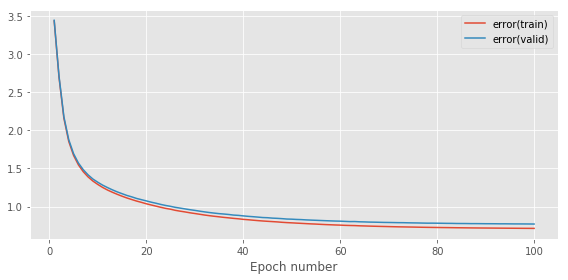

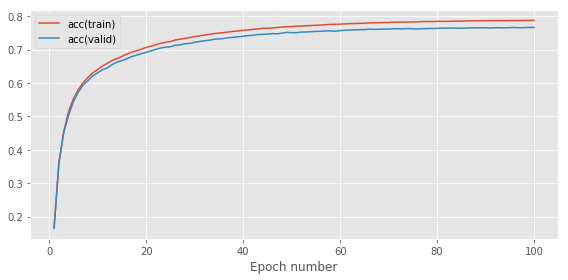

    final error(train) = 7.13e-01
    final error(valid) = 7.70e-01
    final acc(train)   = 7.87e-01
    final acc(valid)   = 7.66e-01
    run time per epoch = 10.71


Epoch 1: 10.5s to complete
    error(train)=3.52e+00, acc(train)=1.62e-01, error(valid)=3.53e+00, acc(valid)=1.56e-01


Epoch 2: 9.9s to complete
    error(train)=2.78e+00, acc(train)=3.34e-01, error(valid)=2.80e+00, acc(valid)=3.28e-01


Epoch 3: 7.2s to complete
    error(train)=2.16e+00, acc(train)=4.59e-01, error(valid)=2.18e+00, acc(valid)=4.54e-01


Epoch 4: 7.2s to complete
    error(train)=1.82e+00, acc(train)=5.23e-01, error(valid)=1.84e+00, acc(valid)=5.19e-01


Epoch 5: 7.1s to complete
    error(train)=1.63e+00, acc(train)=5.57e-01, error(valid)=1.66e+00, acc(valid)=5.53e-01


Epoch 6: 7.4s to complete
    error(train)=1.52e+00, acc(train)=5.83e-01, error(valid)=1.54e+00, acc(valid)=5.79e-01


Epoch 7: 7.2s to complete
    error(train)=1.44e+00, acc(train)=6.01e-01, error(valid)=1.46e+00, acc(valid)=5.92e-01


Epoch 8: 7.1s to complete
    error(train)=1.38e+00, acc(train)=6.15e-01, error(valid)=1.41e+00, acc(valid)=6.04e-01


Epoch 9: 7.0s to complete
    error(train)=1.34e+00, acc(train)=6.27e-01, error(valid)=1.36e+00, acc(valid)=6.15e-01


Epoch 10: 7.2s to complete
    error(train)=1.30e+00, acc(train)=6.37e-01, error(valid)=1.32e+00, acc(valid)=6.24e-01


Epoch 11: 7.1s to complete
    error(train)=1.27e+00, acc(train)=6.44e-01, error(valid)=1.30e+00, acc(valid)=6.30e-01


Epoch 12: 7.1s to complete
    error(train)=1.25e+00, acc(train)=6.49e-01, error(valid)=1.27e+00, acc(valid)=6.38e-01


Epoch 13: 7.2s to complete
    error(train)=1.23e+00, acc(train)=6.55e-01, error(valid)=1.25e+00, acc(valid)=6.44e-01


Epoch 14: 7.5s to complete
    error(train)=1.21e+00, acc(train)=6.59e-01, error(valid)=1.24e+00, acc(valid)=6.48e-01


Epoch 15: 7.5s to complete
    error(train)=1.20e+00, acc(train)=6.62e-01, error(valid)=1.22e+00, acc(valid)=6.50e-01


Epoch 16: 7.4s to complete
    error(train)=1.18e+00, acc(train)=6.66e-01, error(valid)=1.21e+00, acc(valid)=6.54e-01


Epoch 17: 7.4s to complete
    error(train)=1.17e+00, acc(train)=6.68e-01, error(valid)=1.20e+00, acc(valid)=6.57e-01


Epoch 18: 7.6s to complete
    error(train)=1.17e+00, acc(train)=6.70e-01, error(valid)=1.19e+00, acc(valid)=6.59e-01


Epoch 19: 7.5s to complete
    error(train)=1.16e+00, acc(train)=6.72e-01, error(valid)=1.19e+00, acc(valid)=6.61e-01


Epoch 20: 7.5s to complete
    error(train)=1.15e+00, acc(train)=6.74e-01, error(valid)=1.18e+00, acc(valid)=6.62e-01


Epoch 21: 7.3s to complete
    error(train)=1.15e+00, acc(train)=6.75e-01, error(valid)=1.18e+00, acc(valid)=6.63e-01


Epoch 22: 7.4s to complete
    error(train)=1.15e+00, acc(train)=6.76e-01, error(valid)=1.17e+00, acc(valid)=6.65e-01


Epoch 23: 7.3s to complete
    error(train)=1.14e+00, acc(train)=6.76e-01, error(valid)=1.17e+00, acc(valid)=6.65e-01


Epoch 24: 7.4s to complete
    error(train)=1.14e+00, acc(train)=6.77e-01, error(valid)=1.17e+00, acc(valid)=6.66e-01


Epoch 25: 7.4s to complete
    error(train)=1.12e+00, acc(train)=6.82e-01, error(valid)=1.15e+00, acc(valid)=6.72e-01


Epoch 26: 7.4s to complete
    error(train)=1.10e+00, acc(train)=6.86e-01, error(valid)=1.13e+00, acc(valid)=6.76e-01


Epoch 27: 7.3s to complete
    error(train)=1.08e+00, acc(train)=6.91e-01, error(valid)=1.11e+00, acc(valid)=6.78e-01


Epoch 28: 7.3s to complete
    error(train)=1.07e+00, acc(train)=6.95e-01, error(valid)=1.09e+00, acc(valid)=6.83e-01


Epoch 29: 7.2s to complete
    error(train)=1.05e+00, acc(train)=6.99e-01, error(valid)=1.08e+00, acc(valid)=6.84e-01


Epoch 30: 7.2s to complete
    error(train)=1.03e+00, acc(train)=7.03e-01, error(valid)=1.07e+00, acc(valid)=6.90e-01


Epoch 31: 7.5s to complete
    error(train)=1.02e+00, acc(train)=7.07e-01, error(valid)=1.05e+00, acc(valid)=6.94e-01


Epoch 32: 7.3s to complete
    error(train)=1.01e+00, acc(train)=7.10e-01, error(valid)=1.04e+00, acc(valid)=6.97e-01


Epoch 33: 7.2s to complete
    error(train)=9.92e-01, acc(train)=7.15e-01, error(valid)=1.03e+00, acc(valid)=6.99e-01


Epoch 34: 7.1s to complete
    error(train)=9.81e-01, acc(train)=7.18e-01, error(valid)=1.01e+00, acc(valid)=7.04e-01


Epoch 35: 7.3s to complete
    error(train)=9.69e-01, acc(train)=7.20e-01, error(valid)=1.00e+00, acc(valid)=7.06e-01


Epoch 36: 7.1s to complete
    error(train)=9.57e-01, acc(train)=7.23e-01, error(valid)=9.92e-01, acc(valid)=7.09e-01


Epoch 37: 7.0s to complete
    error(train)=9.47e-01, acc(train)=7.25e-01, error(valid)=9.81e-01, acc(valid)=7.10e-01


Epoch 38: 7.1s to complete
    error(train)=9.35e-01, acc(train)=7.29e-01, error(valid)=9.71e-01, acc(valid)=7.14e-01


Epoch 39: 7.2s to complete
    error(train)=9.25e-01, acc(train)=7.32e-01, error(valid)=9.61e-01, acc(valid)=7.15e-01


Epoch 40: 7.0s to complete
    error(train)=9.16e-01, acc(train)=7.34e-01, error(valid)=9.53e-01, acc(valid)=7.17e-01


Epoch 41: 7.0s to complete
    error(train)=9.07e-01, acc(train)=7.36e-01, error(valid)=9.42e-01, acc(valid)=7.21e-01


Epoch 42: 7.0s to complete
    error(train)=8.97e-01, acc(train)=7.39e-01, error(valid)=9.34e-01, acc(valid)=7.21e-01


Epoch 43: 7.2s to complete
    error(train)=8.89e-01, acc(train)=7.41e-01, error(valid)=9.27e-01, acc(valid)=7.24e-01


Epoch 44: 7.1s to complete
    error(train)=8.82e-01, acc(train)=7.43e-01, error(valid)=9.20e-01, acc(valid)=7.24e-01


Epoch 45: 7.1s to complete
    error(train)=8.73e-01, acc(train)=7.45e-01, error(valid)=9.12e-01, acc(valid)=7.28e-01


Epoch 46: 7.0s to complete
    error(train)=8.67e-01, acc(train)=7.47e-01, error(valid)=9.05e-01, acc(valid)=7.29e-01


Epoch 47: 7.2s to complete
    error(train)=8.60e-01, acc(train)=7.49e-01, error(valid)=8.99e-01, acc(valid)=7.29e-01


Epoch 48: 7.2s to complete
    error(train)=8.53e-01, acc(train)=7.51e-01, error(valid)=8.93e-01, acc(valid)=7.31e-01


Epoch 49: 7.0s to complete
    error(train)=8.46e-01, acc(train)=7.52e-01, error(valid)=8.87e-01, acc(valid)=7.33e-01


Epoch 50: 6.9s to complete
    error(train)=8.41e-01, acc(train)=7.53e-01, error(valid)=8.83e-01, acc(valid)=7.34e-01


Epoch 51: 7.1s to complete
    error(train)=8.34e-01, acc(train)=7.55e-01, error(valid)=8.76e-01, acc(valid)=7.36e-01


Epoch 52: 7.0s to complete
    error(train)=8.28e-01, acc(train)=7.57e-01, error(valid)=8.69e-01, acc(valid)=7.36e-01


Epoch 53: 7.0s to complete
    error(train)=8.23e-01, acc(train)=7.58e-01, error(valid)=8.66e-01, acc(valid)=7.37e-01


Epoch 54: 7.1s to complete
    error(train)=8.18e-01, acc(train)=7.59e-01, error(valid)=8.61e-01, acc(valid)=7.38e-01


Epoch 55: 7.0s to complete
    error(train)=8.13e-01, acc(train)=7.61e-01, error(valid)=8.57e-01, acc(valid)=7.40e-01


Epoch 56: 7.0s to complete
    error(train)=8.08e-01, acc(train)=7.62e-01, error(valid)=8.53e-01, acc(valid)=7.42e-01


Epoch 57: 7.3s to complete
    error(train)=8.04e-01, acc(train)=7.63e-01, error(valid)=8.48e-01, acc(valid)=7.41e-01


Epoch 58: 7.1s to complete
    error(train)=8.00e-01, acc(train)=7.64e-01, error(valid)=8.44e-01, acc(valid)=7.42e-01


Epoch 59: 7.0s to complete
    error(train)=7.95e-01, acc(train)=7.65e-01, error(valid)=8.41e-01, acc(valid)=7.44e-01


Epoch 60: 6.9s to complete
    error(train)=7.91e-01, acc(train)=7.67e-01, error(valid)=8.36e-01, acc(valid)=7.44e-01


Epoch 61: 7.0s to complete
    error(train)=7.88e-01, acc(train)=7.67e-01, error(valid)=8.33e-01, acc(valid)=7.46e-01


Epoch 62: 7.0s to complete
    error(train)=7.84e-01, acc(train)=7.69e-01, error(valid)=8.31e-01, acc(valid)=7.46e-01


Epoch 63: 7.0s to complete
    error(train)=7.80e-01, acc(train)=7.70e-01, error(valid)=8.27e-01, acc(valid)=7.47e-01


Epoch 64: 7.1s to complete
    error(train)=7.77e-01, acc(train)=7.70e-01, error(valid)=8.24e-01, acc(valid)=7.49e-01


Epoch 65: 6.9s to complete
    error(train)=7.74e-01, acc(train)=7.70e-01, error(valid)=8.21e-01, acc(valid)=7.49e-01


Epoch 66: 7.4s to complete
    error(train)=7.71e-01, acc(train)=7.71e-01, error(valid)=8.19e-01, acc(valid)=7.48e-01


Epoch 67: 6.6s to complete
    error(train)=7.68e-01, acc(train)=7.72e-01, error(valid)=8.16e-01, acc(valid)=7.50e-01


Epoch 68: 7.0s to complete
    error(train)=7.66e-01, acc(train)=7.73e-01, error(valid)=8.14e-01, acc(valid)=7.52e-01


Epoch 69: 10.6s to complete
    error(train)=7.63e-01, acc(train)=7.73e-01, error(valid)=8.12e-01, acc(valid)=7.51e-01


Epoch 70: 3.7s to complete
    error(train)=7.60e-01, acc(train)=7.74e-01, error(valid)=8.10e-01, acc(valid)=7.52e-01


Epoch 71: 7.5s to complete
    error(train)=7.58e-01, acc(train)=7.74e-01, error(valid)=8.08e-01, acc(valid)=7.53e-01


Epoch 72: 7.5s to complete
    error(train)=7.56e-01, acc(train)=7.75e-01, error(valid)=8.06e-01, acc(valid)=7.54e-01


Epoch 73: 7.6s to complete
    error(train)=7.54e-01, acc(train)=7.76e-01, error(valid)=8.04e-01, acc(valid)=7.55e-01


Epoch 74: 7.5s to complete
    error(train)=7.52e-01, acc(train)=7.76e-01, error(valid)=8.02e-01, acc(valid)=7.55e-01


Epoch 75: 7.7s to complete
    error(train)=7.51e-01, acc(train)=7.76e-01, error(valid)=8.01e-01, acc(valid)=7.55e-01


Epoch 76: 7.4s to complete
    error(train)=7.48e-01, acc(train)=7.78e-01, error(valid)=7.99e-01, acc(valid)=7.57e-01


Epoch 77: 7.4s to complete
    error(train)=7.47e-01, acc(train)=7.78e-01, error(valid)=7.97e-01, acc(valid)=7.57e-01


Epoch 78: 7.5s to complete
    error(train)=7.46e-01, acc(train)=7.78e-01, error(valid)=7.96e-01, acc(valid)=7.58e-01


Epoch 79: 7.6s to complete
    error(train)=7.44e-01, acc(train)=7.78e-01, error(valid)=7.95e-01, acc(valid)=7.57e-01


Epoch 80: 7.4s to complete
    error(train)=7.43e-01, acc(train)=7.79e-01, error(valid)=7.94e-01, acc(valid)=7.58e-01


Epoch 81: 7.7s to complete
    error(train)=7.41e-01, acc(train)=7.79e-01, error(valid)=7.93e-01, acc(valid)=7.58e-01


Epoch 82: 7.5s to complete
    error(train)=7.40e-01, acc(train)=7.79e-01, error(valid)=7.92e-01, acc(valid)=7.58e-01


Epoch 83: 7.5s to complete
    error(train)=7.39e-01, acc(train)=7.80e-01, error(valid)=7.91e-01, acc(valid)=7.58e-01


Epoch 84: 7.6s to complete
    error(train)=7.38e-01, acc(train)=7.81e-01, error(valid)=7.90e-01, acc(valid)=7.59e-01


Epoch 85: 7.5s to complete
    error(train)=7.37e-01, acc(train)=7.80e-01, error(valid)=7.89e-01, acc(valid)=7.60e-01


Epoch 86: 7.7s to complete
    error(train)=7.36e-01, acc(train)=7.81e-01, error(valid)=7.88e-01, acc(valid)=7.59e-01


Epoch 87: 8.1s to complete
    error(train)=7.35e-01, acc(train)=7.81e-01, error(valid)=7.87e-01, acc(valid)=7.60e-01


Epoch 88: 7.5s to complete
    error(train)=7.34e-01, acc(train)=7.81e-01, error(valid)=7.87e-01, acc(valid)=7.60e-01


Epoch 89: 7.7s to complete
    error(train)=7.33e-01, acc(train)=7.82e-01, error(valid)=7.86e-01, acc(valid)=7.60e-01


Epoch 90: 7.5s to complete
    error(train)=7.32e-01, acc(train)=7.82e-01, error(valid)=7.85e-01, acc(valid)=7.59e-01


Epoch 91: 7.6s to complete
    error(train)=7.32e-01, acc(train)=7.82e-01, error(valid)=7.84e-01, acc(valid)=7.61e-01


Epoch 92: 7.5s to complete
    error(train)=7.31e-01, acc(train)=7.82e-01, error(valid)=7.83e-01, acc(valid)=7.62e-01


Epoch 93: 7.5s to complete
    error(train)=7.30e-01, acc(train)=7.82e-01, error(valid)=7.83e-01, acc(valid)=7.61e-01


Epoch 94: 7.6s to complete
    error(train)=7.29e-01, acc(train)=7.82e-01, error(valid)=7.83e-01, acc(valid)=7.62e-01


Epoch 95: 7.5s to complete
    error(train)=7.29e-01, acc(train)=7.82e-01, error(valid)=7.82e-01, acc(valid)=7.62e-01


Epoch 96: 7.6s to complete
    error(train)=7.28e-01, acc(train)=7.83e-01, error(valid)=7.81e-01, acc(valid)=7.62e-01


Epoch 97: 7.5s to complete
    error(train)=7.28e-01, acc(train)=7.83e-01, error(valid)=7.81e-01, acc(valid)=7.62e-01


Epoch 98: 7.6s to complete
    error(train)=7.27e-01, acc(train)=7.83e-01, error(valid)=7.81e-01, acc(valid)=7.62e-01


Epoch 99: 7.9s to complete
    error(train)=7.26e-01, acc(train)=7.83e-01, error(valid)=7.80e-01, acc(valid)=7.63e-01


Epoch 100: 7.5s to complete
    error(train)=7.25e-01, acc(train)=7.83e-01, error(valid)=7.79e-01, acc(valid)=7.63e-01



--------------------------------------------------------------------------------
Ti=25.00
--------------------------------------------------------------------------------


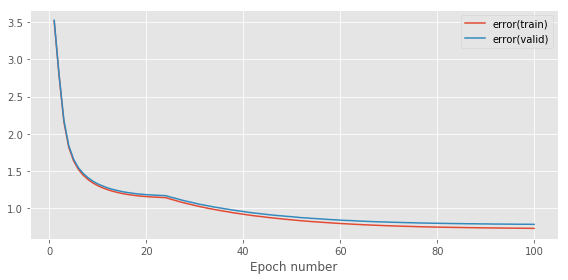

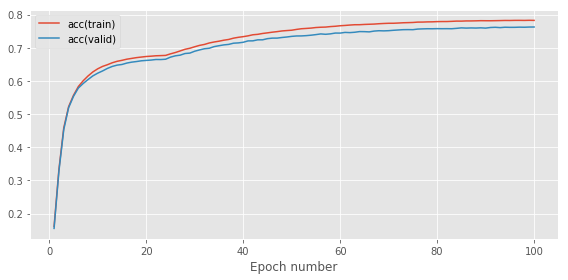

    final error(train) = 7.25e-01
    final error(valid) = 7.79e-01
    final acc(train)   = 7.83e-01
    final acc(valid)   = 7.63e-01
    run time per epoch = 9.87


In [4]:
# The model set up code below is provided as a starting point.
# You will probably want to add further code cells for the
# different experiments you run.

for total_iters_per_period in [101, 25]:
    
    #setup hyperparameters
    min_learning_rate = 1e-6
    max_learning_rate = 1e-5
    max_learning_rate_discount_factor = 0.8
    period_iteration_expansion_factor = 3
    num_epochs = 100

    stats_interval = 1
    input_dim, output_dim, hidden_dim = 784, 47, 100

    weights_init = GlorotUniformInit(rng=rng)
    biases_init = ConstantInit(0.)
    model = MultipleLayerModel([
        AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
        ReluLayer(),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
        ReluLayer(),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init),
        ReluLayer(),
        AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
    ])

    error = CrossEntropySoftmaxError()
    # Use a basic gradient descent learning rule
    learning_rule = AdamLearningRule()

    scheduler = CosineAnnealingWithWarmRestarts(min_learning_rate, max_learning_rate, total_iters_per_period, max_learning_rate_discount_factor,
                     period_iteration_expansion_factor)

    #Remember to use notebook=False when you write a script to be run in a terminal
    stats, keys, run_time, fig_1, ax_1, fig_2, ax_2 = train_model_and_plot_stats(
        model, error, learning_rule, train_data, scheduler, valid_data, num_epochs, stats_interval, notebook=True)

    fig_1.tight_layout()
    fig_1_name = "adam_fig_1_" + str(total_iters_per_period) + ".pdf"
    fig_1.savefig(fig_1_name)

    fig_2.tight_layout()
    fig_2_name = "adam_fig_2_" + str(total_iters_per_period) + ".pdf"
    fig_2.savefig(fig_2_name)

    print('-' * 80)
    print('Ti={0:.2f}'
          .format(total_iters_per_period))
    print('-' * 80)

    plt.show()

    print('    final error(train) = {0:.2e}'.format(stats[-1, keys['error(train)']]))
    print('    final error(valid) = {0:.2e}'.format(stats[-1, keys['error(valid)']]))
    print('    final acc(train)   = {0:.2e}'.format(stats[-1, keys['acc(train)']]))
    print('    final acc(valid)   = {0:.2e}'.format(stats[-1, keys['acc(valid)']]))
    print('    run time per epoch = {0:.2f}'.format(run_time * 1. / num_epochs))